In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/crop.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        "/content/crop/train",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )


Found 14 images belonging to 2 classes.


In [ ]:
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "/content/crop/test",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 9 images belonging to 2 classes.


In [ ]:
import os
print(os.listdir('/content/crop'))

['test', 'train']


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [ ]:

from tensorflow.keras.regularizers import l2

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [ ]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,545 (1.04 MB)

 Trainable params: 272,545 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [ ]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.0086 - val_accuracy: 0.4444 - val_loss: 0.9697
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5000 - loss: 0.9916 - val_accuracy: 0.7778 - val_loss: 0.8606
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7857 - loss: 0.9118 - val_accuracy: 0.7778 - val_loss: 0.7789
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.7143 - loss: 0.8911 - val_accuracy: 0.5556 - val_loss: 0.8827
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5000 - loss: 0.8088 - val_accuracy: 0.4444 - val_loss: 0.9596
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5000 - loss: 0.8403 - val_accuracy: 0.4444 - val_loss: 0.9876
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.5000 - loss: 0.7810 - val_accuracy: 0.5556 - val_loss: 0.7681
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5714 - loss: 0.6557 - val_accuracy: 0.8889 - val_loss: 0.6469


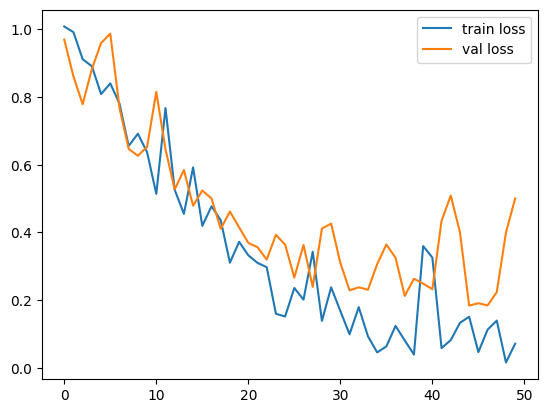

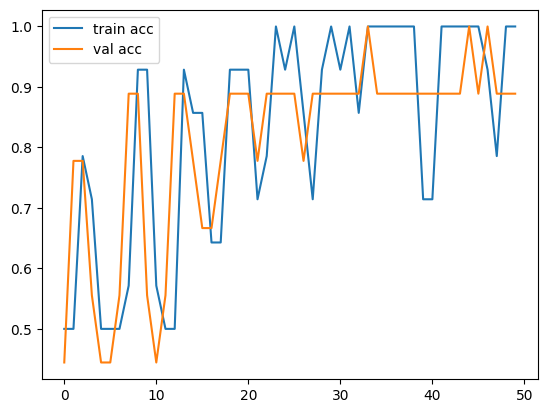

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

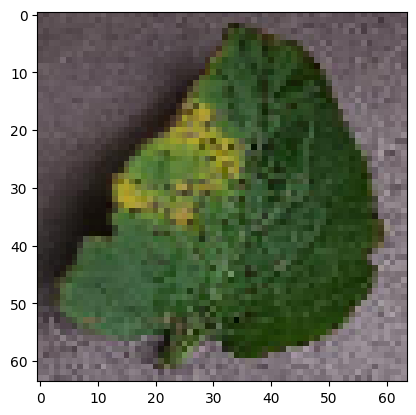

In [ ]:
from tensorflow.keras.preprocessing import image
import cv2
test_image = image.load_img('/content/crop/test/fault/3.jpeg', target_size=(64,64))

plt.imshow(test_image)


In [ ]:
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


In [ ]:
if result[0] < 0.5:
    print("The image classified is faulty crop")
else:
    print("The image classified is normal crop")


The image classified is faulty crop


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
Y_pred = cnn.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
Confusion Matrix
[[4 0]
 [5 0]]


In [ ]:
print('Classification Report')
target_names = ['faulty crop', 'normal crop']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

 faulty crop       0.44      1.00      0.62         4
 normal crop       0.00      0.00      0.00         5

    accuracy                           0.44         9
   macro avg       0.22      0.50      0.31         9
weighted avg       0.20      0.44      0.27         9



In [ ]:
scores=cnn.evaluate(test_set)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8889 - loss: 0.2632
